Dependencias:

In [1]:
import tensorflow as t
from tensorflow import keras as k

import os
import numpy as n


import matplotlib.pyplot as p

# Cargamos el modelo preentrenado ResNet50
from keras.preprocessing import image
from keras.applications.resnet import ResNet50
from keras.applications.resnet import preprocess_input
from keras.applications.resnet import decode_predictions

In [7]:
# Instanciamos ResNet50
resnet = ResNet50(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

In [8]:
data_folder = 'data'

35363/35363 [==============================] - 0s 1us/step


[[('n01491361', 'tiger_shark', 0.926234),
  ('n01484850', 'great_white_shark', 0.028222326),
  ('n02640242', 'sturgeon', 0.021404522),
  ('n02536864', 'coho', 0.0039971885),
  ('n01494475', 'hammerhead', 0.0025324074)]]

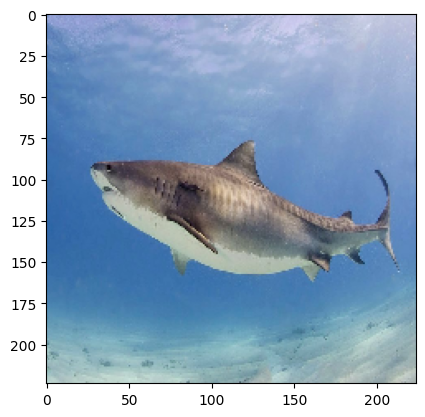

In [9]:
img = image.image_utils.load_img(os.path.join(data_folder,'Tiger_shark.jpg'), target_size=(224, 224))
img = image.image_utils.img_to_array(img)
p.imshow(img / 255) 
x = preprocess_input(n.expand_dims(img, axis=0))
preds = resnet.predict(x)
decode_predictions(preds, top=5)